# Problem Statement

#### Bomm Bikes a bike sharing company has made an attempt to understand the demand for shared bikes among the people. Specifically they want to understand the factors affecting the demand for shared bikes in the American market. The company wants to know:

###### 1. Which variables are significant in predicting demand demand for shared bikes.
###### 2. How well those variables describe the bike demands.

###### Goal:
- To create a linear model that quantitatively relates bike demand with variables, such as the holiday, weather, season or month etc.
- To know the accuracy of the model, i.e. how well do these variables predict the bike demand

##### Steps followed in the Linear Regression Modelling:
- Step 1: Reading and Understanding Data
- Step 2: Visualizing the Data
- Step 3: Prepare the data for Modelling
    - Encoding -> Binary Variable to 0 or 1
    - Categorical variable to dummy variables
    - Split the data to train and test set
    - Rescaling the features
- Step 4: Train the model
- Step 5: Residual Analysis
- Step 6: Prediction and Evaluation on Test data set

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries that will be used here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
#loading bike sharing data set
bike_df = pd.read_csv('day.csv')

### Step 1 - Reading and Understanding Data

In [4]:
#explore the data by looking at column and values
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2 - Visulazing Data
###### This is most important step to understand your data set.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We can make use of matplot lib and seaborn to visualize the data set.


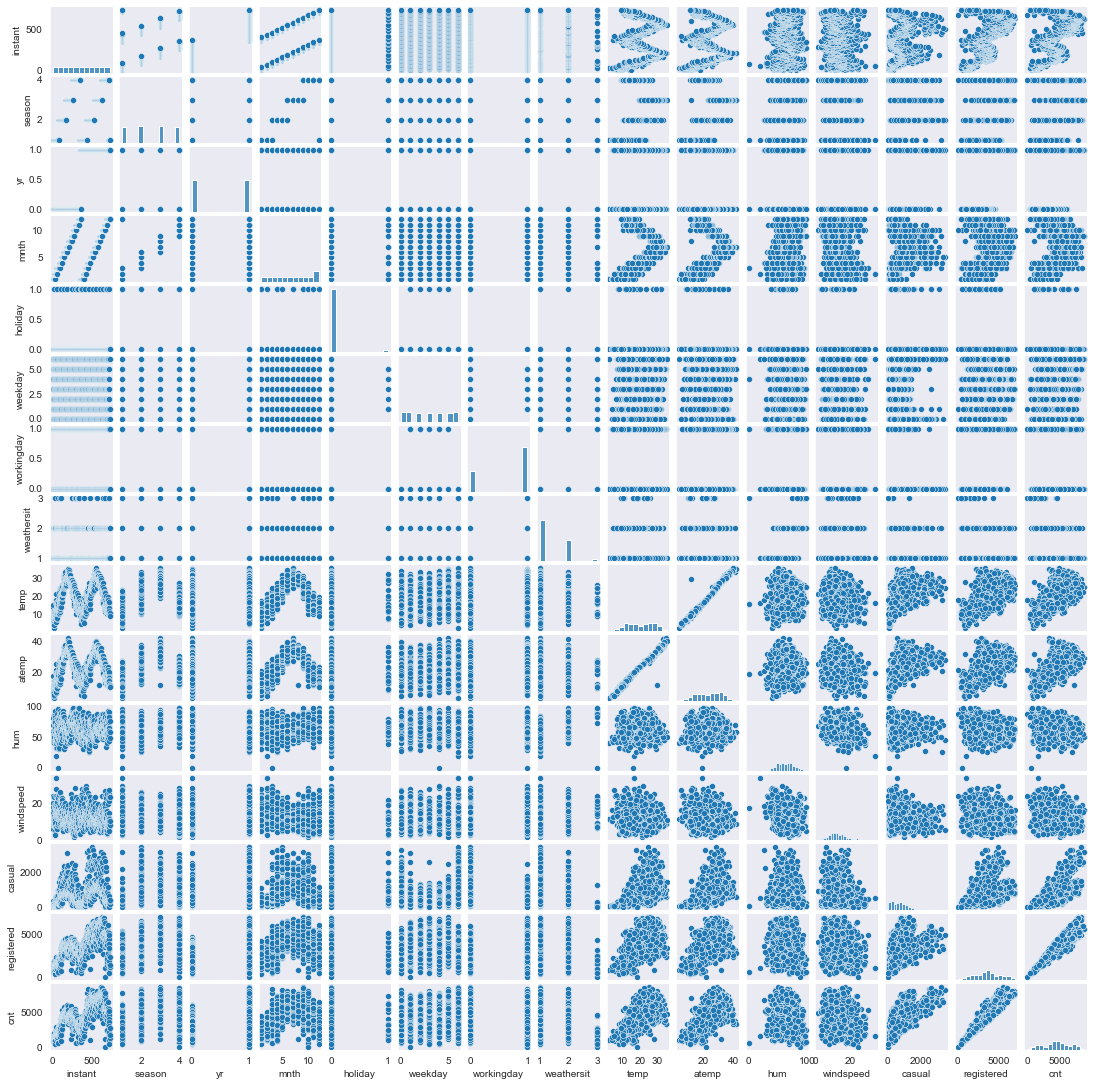

In [8]:
g = sns.pairplot(bike_df)
g.fig.set_size_inches(15,15)
plt.show()

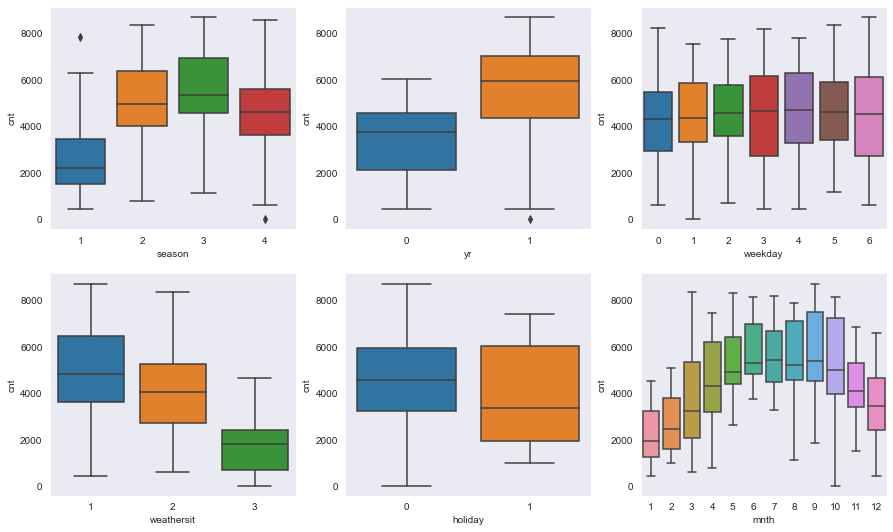

In [9]:
#box plot visualization for categorical variable with count (cnt)
plt.figure(figsize=(15,9))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)

plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)

plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)

plt.show()

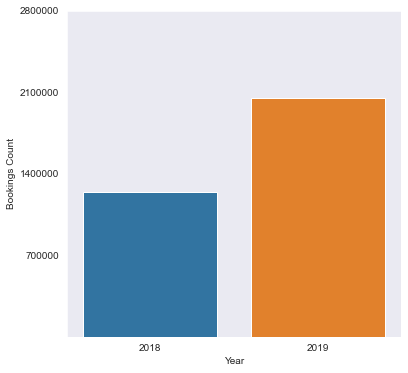

In [10]:
#Total Number of bookings in 2018 and 2019
plt.figure(figsize=(6,6))
g = sns.barplot(x='yr', y='cnt', data=bike_df, estimator=sum, ci=None)
ticks = [700000, 1400000, 2100000, 2800000]
g.set_yticks(ticks)
g.set_xticklabels(['2018', '2019'])
g.set(xlabel="Year", ylabel="Bookings Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

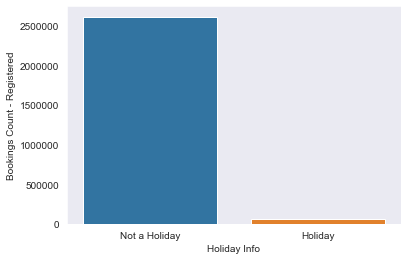

In [11]:
#holiday with registered and casual registrations
#plt.figure(figsize=(15,9))

#plt.subplot(1,2,1)
h = sns.barplot(x='holiday', y='registered', data=bike_df, estimator=sum, ci=None)
#ticks = [3000000, 6000000, 9000000, 12000000]
#h.set_yticks(ticks)
h.set_xticklabels(['Not a Holiday', 'Holiday'])
h.set(xlabel="Holiday Info", ylabel="Bookings Count - Registered")
plt.ticklabel_format(style='plain', axis='y')
#.set(title='Total Registered Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Registered Booking')


plt.show()

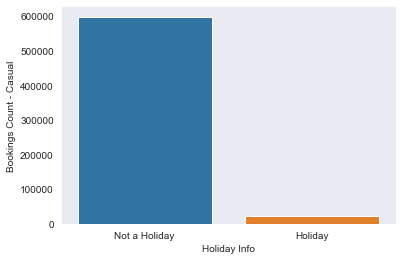

In [12]:
#plt.subplot(1,2,2)
i = sns.barplot(x = 'holiday', y = 'casual', data = bike_df, estimator=sum, ci=None)
#ticks = [200000, 400000, 600000, 800000]
#i.set_yticks(ticks)
i.set_xticklabels(['Not a Holiday', 'Holiday'])
i.set(xlabel="Holiday Info", ylabel="Bookings Count - Casual")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#.set(title='Total Casual Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Casual Booking')

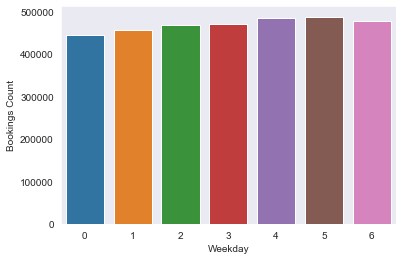

In [13]:
#plt.subplot(1,2,2)
i = sns.barplot(x = 'weekday', y = 'cnt', data = bike_df, estimator=sum, ci=None)
#ticks = [200000, 400000, 600000, 800000]
#i.set_yticks(ticks)

i.set(xlabel="Weekday", ylabel="Bookings Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#.set(title='Total Casual Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Casual Booking')

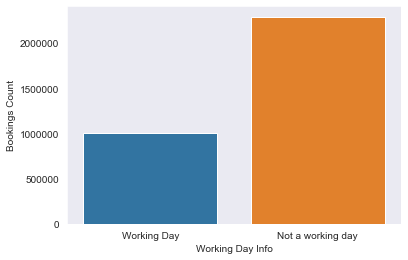

In [14]:
#plt.subplot(1,2,2)
i = sns.barplot(x = 'workingday', y = 'cnt', data = bike_df, estimator=sum, ci=None)
#ticks = [200000, 400000, 600000, 800000]
#i.set_yticks(ticks)
i.set_xticklabels(['Working Day', 'Not a working day'])
i.set(xlabel="Working Day Info", ylabel="Bookings Count")
plt.ticklabel_format(style='plain', axis='y')
plt.show()
#.set(title='Total Casual Bookings in 2018 and 2019 in holiday and non-holiday', xlabel='Holiday', ylabel='Casual Booking')

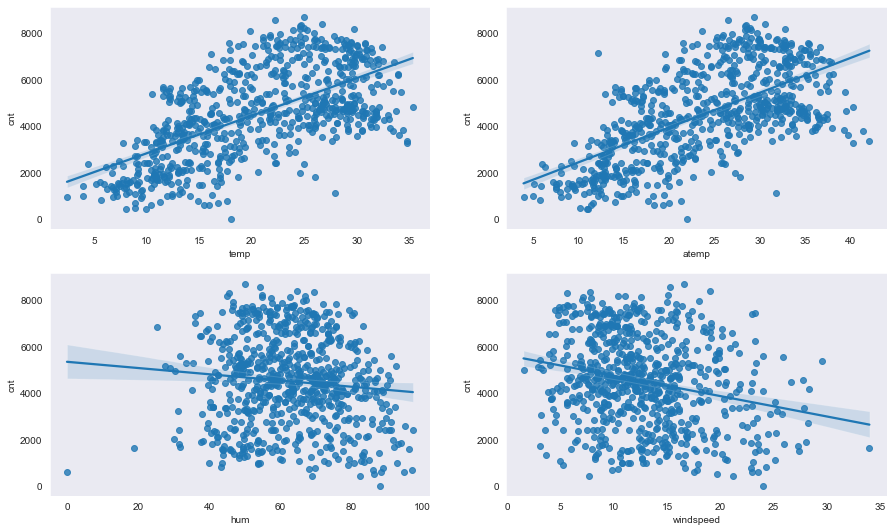

In [15]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.regplot(x='temp', y='cnt', data=bike_df)

plt.subplot(2,2,2)
sns.regplot(x='atemp', y='cnt', data=bike_df)

plt.subplot(2,2,3)
sns.regplot(x='hum', y='cnt', data=bike_df)

plt.subplot(2,2,4)
sns.regplot(x='windspeed', y='cnt', data=bike_df)


plt.show()

#Remove the following variables as it has no impact on outcome:
1. instant
2. dteday
3. casual
4. registered
5. temp



In [16]:
bike_df.drop(['instant', 'dteday', 'casual', 'registered', 'temp'], axis=1, inplace=True)

In [17]:
#our bike dataframe is simplified to:
bike_df.shape

(730, 11)

###### Analysis outcome with Step 1 & Step 2 - Reading &Visualizing data set:
- Seasonal Aspect, Demand is:
        - High in Summer and Fall 
        - Average in Winter
        - Low in Spring

- Weather Situation, Demand is:
        - High on Clear, Partly Cloudy days
        - Average on Misty, Cloudy days
        - Low on Snow and Rainy days

- Temperature and feels like temperature, Demand:
        - Surges as temperature rises

- Month Aspect, Demand:
        - Peak near month of May, June, July, August September
        - Tapers on either side of the year w.r.t above months.

- Registered Customers with respect to holidays/non-holidays:
        - Higher percentage of booking(both casual and registered) happens in non-holidays.
        - During holiday the booking remains very low (both casual and registered) when compared to non-holidays.

- Total Number of Bookings has seen good increase from year 2018 to 2019.
- Number of booking count is high on a non-working day when compared to working day.

### Step 3 - Prepare the Data for Modelling

###### Apply Encoding and One-Hot Technique for columns
- season
- mnth
- weekday
- weathersit

#### Split the data into training and test data set

In [18]:
bike_df.shape

(730, 11)

#### ENCODING - One Hot Technique - STARTS

In [19]:
#One - hot encoding for column 'season':

# Defining the map function
def season_string_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Applying the function to the bike df 
bike_df[['season']] = bike_df[['season']].apply(season_string_map)

In [20]:
bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [21]:
bike_df = pd.get_dummies(bike_df, columns=['season'])

In [22]:
#One - hot encoding for column 'mnth':

# Defining the map function
def mnth_string_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
                  5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Applying the function to the bike df 
bike_df[['mnth']] = bike_df[['mnth']].apply(mnth_string_map)

In [23]:
bike_df = pd.get_dummies(bike_df, columns=['mnth'])

In [24]:
#One - hot encoding for column 'week day':

# Defining the map function
def weekday_string_map(x):
    return x.map({6: 'Mon', 0: 'Tue', 1: 'Wed', 2: 'Thu', 
                  3: 'Fri', 4: 'Sat', 5: 'Sun'})

# Applying the function to the bike df 
bike_df[['weekday']] = bike_df[['weekday']].apply(weekday_string_map)

In [25]:
bike_df = pd.get_dummies(bike_df, columns=['weekday'])

In [26]:
#One - hot encoding for column 'weathersit':

# Defining the map function
def weathersit_string_map(x):
    return x.map({1: 'Clear', 2: 'Misty', 3: 'Light_Snow', 4: 'Heavy_Rain'})

# Applying the function to the bike df 
bike_df[['weathersit']] = bike_df[['weathersit']].apply(weathersit_string_map)

In [27]:
bike_df = pd.get_dummies(bike_df, columns=['weathersit'])

In [28]:
bike_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


#### ENCODING - One Hot Technique - ENDS

In [29]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

bike_df_train, bike_df_test = train_test_split(bike_df, train_size=0.5, random_state=100)
print('Train data shape: ', bike_df_train.shape)
print('Test data shape: ', bike_df_test.shape)

Train data shape:  (365, 33)
Test data shape:  (365, 33)


In [30]:
bike_df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
417,1,0,1,19.63335,56.7917,15.709557,4773,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
55,0,0,1,17.52305,71.2174,23.218113,1461,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
388,1,0,1,17.45540,83.5833,8.292389,4339,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
146,0,0,1,31.85040,65.3750,16.125493,4679,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
592,1,0,1,32.73440,51.9167,9.500332,7605,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


#### Rescaling of features

Rescaling of feature or predictor variables may not be essential in case of simple linear regression, as it deals with
one predictor variable. Here in MLR - multiple linear regression, we need to scale the variables so their coefficients 
are comparable when you build models. The different techniques for scaling: 
1. Min-Max Scaling (normalization): between 0 and 1
2. Standardization (mean - 0, sigma - 1)

Advantages of Rescaling:
1. Interpretability of data and models become easier
2. Data processing would be faster for large dataset and models can be built in relatively short time interval.

Here in this case study we would be using Min-Max Scaling.

Formula for Min-Max scaling:

normalization: (x - x_min)/(x_max - x_min)

In [31]:


#1. Instantiate MinMax Scaler
min_max_scaler = MinMaxScaler()

#create list of numeric vars
numeric_vars = ['atemp', 'hum', 'windspeed', 'cnt']

bike_df_train[numeric_vars] = min_max_scaler.fit_transform(bike_df_train[numeric_vars])



In [32]:
bike_df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
417,1,0,1,0.411639,0.585230,0.409183,0.546595,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
55,0,0,1,0.356238,0.733885,0.651724,0.165555,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
388,1,0,1,0.354462,0.861313,0.169595,0.496664,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
146,0,0,1,0.732369,0.673679,0.422619,0.535780,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
592,1,0,1,0.755577,0.534994,0.208614,0.872411,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [33]:
bike_df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.512329,0.016438,0.693151,0.513085,0.649367,0.323520,0.516252,0.257534,0.249315,0.252055,0.241096,0.063014,0.098630,0.084932,0.065753,0.084932,0.065753,0.082192,0.112329,0.101370,0.079452,0.087671,0.073973,0.175342,0.158904,0.134247,0.131507,0.117808,0.131507,0.150685,0.638356,0.032877,0.328767
std,0.500534,0.127329,0.461819,0.214840,0.147698,0.175151,0.230120,0.437876,0.433210,0.434789,0.428336,0.243321,0.298574,0.279162,0.248191,0.279162,0.248191,0.275034,0.316204,0.302232,0.270814,0.283204,0.262086,0.380782,0.366088,0.341385,0.338418,0.322823,0.338418,0.358233,0.481136,0.178559,0.470410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339548,0.537999,0.193806,0.350437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.536771,0.652211,0.301468,0.517602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.690109,0.756977,0.414520,0.701335,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


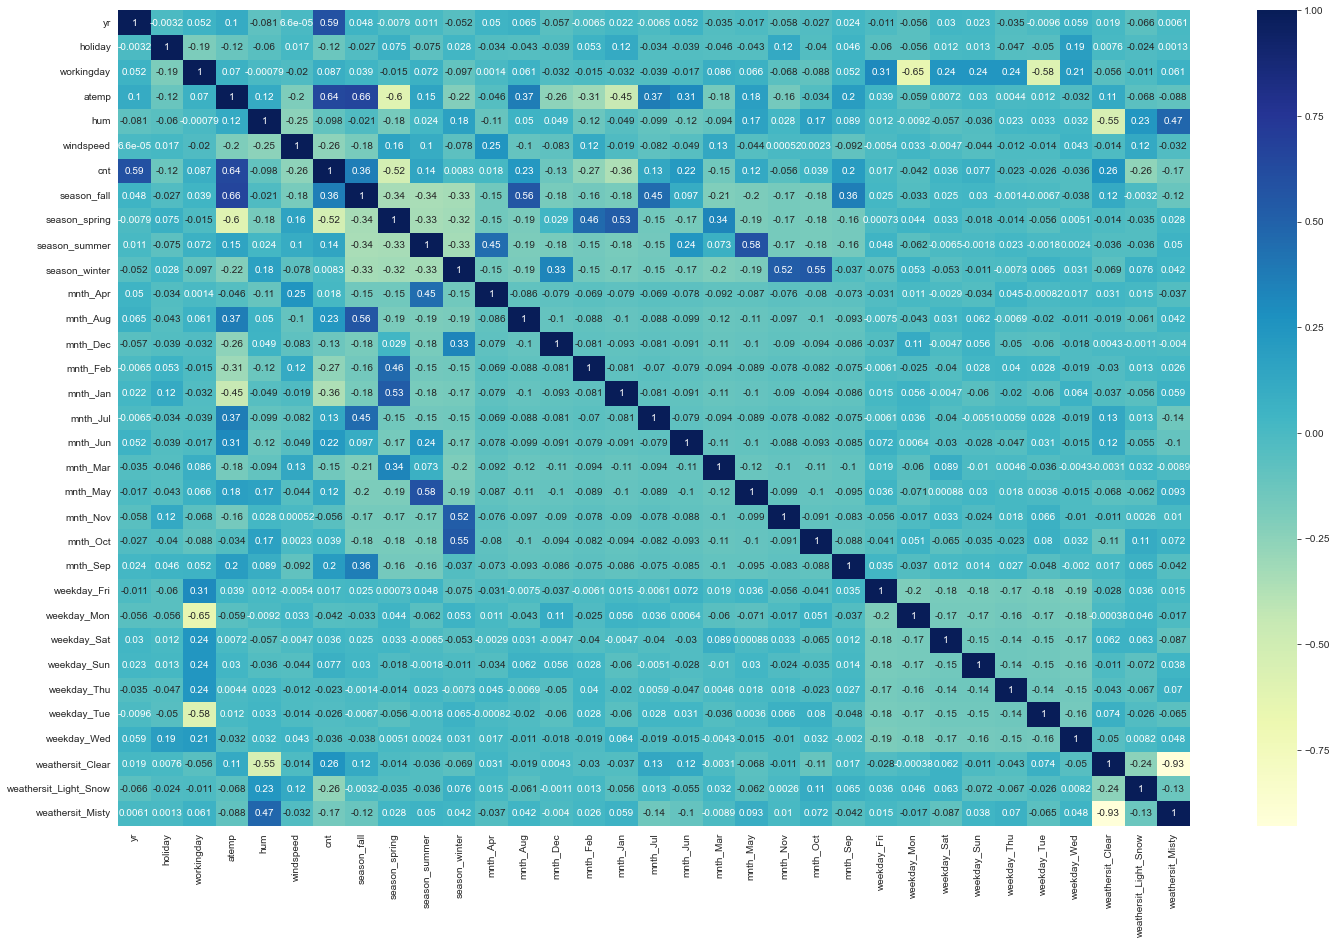

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 15))
sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Dividing into X and Y sets for the model building

In [35]:
#adding all columns to the model.
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [36]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

### Step 4 - Train the Model

###### Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.


Conditions considered in dropping features:

    High - p , High - VIF -> should be dropped
    High - Low -> ??
        High - p , Low - VIF -> remove these first and re-run the model
        High - VIF , Low - p -> remove these after the above case.
    Low - p , Low - VIF -> we can keep this feature
    

Conditions applied: Feature have values are dropped with given values:
- VIF > 6.5 dropped (Industry standard practice few consider below 10 is good, but conservative models look at 5 as critical value for banking and healthcare related ones. Here I have chosen average at 6.5 as critical value for VIF)
- p-Value > 0.05 dropped



In [37]:
# Add a constant - a statsmodel will not coeff factor.
X_train_lm = sm.add_constant(X_train)

lr_all = sm.OLS(y_train, X_train_lm).fit()

lr_all.params

const                    0.129127
yr                       0.239539
holiday                 -0.043589
workingday               0.061040
atemp                    0.430982
hum                     -0.175943
windspeed               -0.202995
season_fall              0.003626
season_spring           -0.035798
season_summer            0.050567
season_winter            0.110731
mnth_Apr                 0.023775
mnth_Aug                 0.056098
mnth_Dec                -0.038589
mnth_Feb                -0.026470
mnth_Jan                -0.068802
mnth_Jul                -0.006458
mnth_Jun                 0.026239
mnth_Mar                 0.016357
mnth_May                 0.036138
mnth_Nov                -0.023993
mnth_Oct                 0.020391
mnth_Sep                 0.114442
weekday_Fri              0.009397
weekday_Mon              0.082461
weekday_Sat              0.014525
weekday_Sun              0.017871
weekday_Thu             -0.011258
weekday_Tue              0.029215
weekday_Wed   

In [38]:
print(lr_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     69.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.36e-120
Time:                        22:42:09   Log-Likelihood:                 362.46
No. Observations:                 365   AIC:                            -668.9
Df Residuals:                     337   BIC:                            -559.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

#### Analysis on above stats model result:

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.
Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖= 1 / (1−𝑅𝑖^2)
¶

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,mnth_Jun,inf
1,holiday,inf
30,weathersit_Light_Snow,inf
29,weathersit_Clear,inf
28,weekday_Wed,inf
27,weekday_Tue,inf
26,weekday_Thu,inf
25,weekday_Sun,inf
24,weekday_Sat,inf
23,weekday_Mon,inf


##### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

We need to drop the variable:weekday_Sat and update the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. 
One of these variables is, weekday_Sat as it has a very high p-value of 0.890. 

Lets drop this variable, and check out the result again.

Note: We should drop only one predictor variable at a time and evaluate the model again.


In [40]:
# Dropping highly correlated variables and insignificant variables

X_drop_1 = X_train.drop('season_fall', 1)

In [41]:
X_drop_1.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [42]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_1_lm = sm.add_constant(X_drop_1)

lr_drop_1 = sm.OLS(y_train, X_drop_1_lm).fit()

lr_drop_1.params

const                    0.131249
yr                       0.239539
holiday                 -0.043147
workingday               0.061482
atemp                    0.430982
hum                     -0.175943
windspeed               -0.202995
season_spring           -0.039424
season_summer            0.046941
season_winter            0.107105
mnth_Apr                 0.023952
mnth_Aug                 0.056274
mnth_Dec                -0.038412
mnth_Feb                -0.026293
mnth_Jan                -0.068625
mnth_Jul                -0.006281
mnth_Jun                 0.026416
mnth_Mar                 0.016534
mnth_May                 0.036314
mnth_Nov                -0.023816
mnth_Oct                 0.020568
mnth_Sep                 0.114619
weekday_Fri              0.009574
weekday_Mon              0.083080
weekday_Sat              0.014702
weekday_Sun              0.018048
weekday_Thu             -0.011081
weekday_Tue              0.029834
weekday_Wed             -0.012908
weathersit_Cle

In [43]:
print(lr_drop_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     69.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.36e-120
Time:                        22:42:10   Log-Likelihood:                 362.46
No. Observations:                 365   AIC:                            -668.9
Df Residuals:                     337   BIC:                            -559.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_1.columns
vif['VIF'] = [variance_inflation_factor(X_drop_1.values, i) for i in range(X_drop_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,mnth_Jun,inf
16,mnth_Mar,inf
29,weathersit_Light_Snow,inf
28,weathersit_Clear,inf
27,weekday_Wed,inf
26,weekday_Tue,inf
25,weekday_Thu,inf
24,weekday_Sun,inf
23,weekday_Sat,inf
22,weekday_Mon,inf


In [45]:
#now let drop: mnth_Jul - Dropping highly correlated variables and insignificant variables

X_drop_2 = X_drop_1.drop('mnth_Jul', 1)

In [46]:
X_drop_2.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Fri',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [47]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_2_lm = sm.add_constant(X_drop_2)

lr_drop_2 = sm.OLS(y_train, X_drop_2_lm).fit()

lr_drop_2.params

const                    0.127384
yr                       0.239539
holiday                 -0.043952
workingday               0.060677
atemp                    0.430982
hum                     -0.175943
windspeed               -0.202995
season_spring           -0.039424
season_summer            0.046941
season_winter            0.107105
mnth_Apr                 0.030233
mnth_Aug                 0.062556
mnth_Dec                -0.032131
mnth_Feb                -0.020012
mnth_Jan                -0.062344
mnth_Jun                 0.032697
mnth_Mar                 0.022815
mnth_May                 0.042596
mnth_Nov                -0.017534
mnth_Oct                 0.026849
mnth_Sep                 0.120900
weekday_Fri              0.009252
weekday_Mon              0.081952
weekday_Sat              0.014380
weekday_Sun              0.017726
weekday_Thu             -0.011403
weekday_Tue              0.028707
weekday_Wed             -0.013231
weathersit_Clear         0.145267
weathersit_Lig

In [48]:
lr_drop_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     69.55
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.36e-120
Time:                        22:42:11   Log-Likelihood:                 362.46
No. Observations:                 365   AIC:                            -668.9
Df Residuals:                     337   BIC:                            -559.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1274      0.034      3.767      0.000       0.061       0.194
yr                        0.2395      0.010     23.803      0.000       0.220       0.259
holiday                  -0.0440      0.030     -1.468      0.143      -0.103       0.015
workingday                0.0607      0.014      4.324      0.000       0.033       0.088
atemp                     0.4310      0.054      7.931      0.000       0.324       0.538
hum                      -0.1759      0.046     -3.805      0.000      -0.267      -0.085
windspeed                -0.2030      0.032     -6.425      0.000      -0.265      -0.141
season_spring            -0.0394      0.037     -1.064      0.288      -0.112       0.033
season_summer             0.0469      0.031      1.497      0.135      -0.015       0.109
season_winter             0.1071      0.037      2.906      0.004       0.035       0.180
mnth_Apr                  0.0302      0.044      0.693      0.489      -0.056       0.116
mnth_Aug                  0.0626      0.025      2.467      0.014       0.013       0.112
mnth_Dec                 -0.0321      0.049     -0.659      0.510      -0.128       0.064
mnth_Feb                 -0.0200      0.052     -0.383      0.702      -0.123       0.083
mnth_Jan                 -0.0623      0.054     -1.156      0.249      -0.168       0.044
mnth_Jun                  0.0327      0.032      1.032      0.303      -0.030       0.095
mnth_Mar                  0.0228      0.044      0.518      0.605      -0.064       0.109
mnth_May                  0.0426      0.040      1.060      0.290      -0.036       0.122
mnth_Nov                 -0.0175      0.050     -0.352      0.725      -0.116       0.081
mnth_Oct                  0.0268      0.048      0.563      0.574      -0.067       0.121
mnth_Sep                  0.1209      0.029      4.208      0.000       0.064       0.177
weekday_Fri               0.0093      0.012      0.771      0.441      -0.014       0.033
weekday_Mon               0.0820      0.016      5.239      0.000       0.051       0.113
weekday_Sat               0.0144      0.013      1.096      0.274      -0.011       0.040
weekday_Sun               0.0177      0.013      1.368      0.172      -0.008       0.043
weekday_Thu              -0.0114      0.014     -0.822      0.412      -0.039       0.016
weekday_Tue               0.0287      0.016      1.750      0.081      -0.004       0.061
weekday_Wed              -0.0132      0.012     -1.097      0.273      -0.037       0.010
weathersit_Clear          0.1453      0.014     10.541      0.000       0.118       0.172
weathersit_Light_Snow    -0.1060      0.025     -4.238      0.000      -0.155      -0.057
weathersit_Misty          0.0881      0.016      5.592      0.000       0.057       0.119
=======================

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_2.columns
vif['VIF'] = [variance_inflation_factor(X_drop_2.values, i) for i in range(X_drop_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,weathersit_Misty,inf
1,holiday,inf
2,workingday,inf
28,weathersit_Light_Snow,inf
27,weathersit_Clear,inf
26,weekday_Wed,inf
25,weekday_Tue,inf
24,weekday_Thu,inf
23,weekday_Sun,inf
22,weekday_Sat,inf


In [50]:
#now let drop: mnth_Nov - Dropping highly correlated variables and insignificant variables

X_drop_3 = X_drop_2.drop('mnth_Nov', 1)

In [51]:
X_drop_3.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Fri', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_Snow',
       'weathersit_Misty'],
      dtype='object')

In [52]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_3_lm = sm.add_constant(X_drop_3)

lr_drop_3 = sm.OLS(y_train, X_drop_3_lm).fit()

lr_drop_3.params

const                    0.122624
yr                       0.239625
holiday                 -0.045646
workingday               0.059919
atemp                    0.438843
hum                     -0.177939
windspeed               -0.203221
season_spring           -0.044711
season_summer            0.044394
season_winter            0.097814
mnth_Apr                 0.038042
mnth_Aug                 0.065813
mnth_Dec                -0.017474
mnth_Feb                -0.007792
mnth_Jan                -0.049476
mnth_Jun                 0.037404
mnth_Mar                 0.033045
mnth_May                 0.049462
mnth_Oct                 0.041470
mnth_Sep                 0.126591
weekday_Fri              0.008839
weekday_Mon              0.080822
weekday_Sat              0.013415
weekday_Sun              0.017304
weekday_Thu             -0.011803
weekday_Tue              0.027529
weekday_Wed             -0.013482
weathersit_Clear         0.143435
weathersit_Light_Snow   -0.107153
weathersit_Mis

In [53]:
lr_drop_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     72.41
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.68e-121
Time:                        22:42:11   Log-Likelihood:                 362.39
No. Observations:                 365   AIC:                            -670.8
Df Residuals:                     338   BIC:                            -565.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1226      0.031      3.962      0.000       0.062       0.184
yr                        0.2396      0.010     23.850      0.000       0.220       0.259
holiday                  -0.0456      0.030     -1.547      0.123      -0.104       0.012
workingday                0.0599      0.014      4.327      0.000       0.033       0.087
atemp                     0.4388      0.049      8.871      0.000       0.342       0.536
hum                      -0.1779      0.046     -3.883      0.000      -0.268      -0.088
windspeed                -0.2032      0.032     -6.441      0.000      -0.265      -0.141
season_spring            -0.0447      0.034     -1.322      0.187      -0.111       0.022
season_summer             0.0444      0.030      1.457      0.146      -0.016       0.104
season_winter             0.0978      0.026      3.809      0.000       0.047       0.148
mnth_Apr                  0.0380      0.038      1.014      0.311      -0.036       0.112
mnth_Aug                  0.0658      0.024      2.792      0.006       0.019       0.112
mnth_Dec                 -0.0175      0.025     -0.693      0.489      -0.067       0.032
mnth_Feb                 -0.0078      0.039     -0.199      0.842      -0.085       0.069
mnth_Jan                 -0.0495      0.040     -1.249      0.212      -0.127       0.028
mnth_Jun                  0.0374      0.029      1.304      0.193      -0.019       0.094
mnth_Mar                  0.0330      0.033      1.000      0.318      -0.032       0.098
mnth_May                  0.0495      0.035      1.411      0.159      -0.020       0.118
mnth_Oct                  0.0415      0.023      1.778      0.076      -0.004       0.087
mnth_Sep                  0.1266      0.024      5.339      0.000       0.080       0.173
weekday_Fri               0.0088      0.012      0.741      0.459      -0.015       0.032
weekday_Mon               0.0808      0.015      5.286      0.000       0.051       0.111
weekday_Sat               0.0134      0.013      1.047      0.296      -0.012       0.039
weekday_Sun               0.0173      0.013      1.343      0.180      -0.008       0.043
weekday_Thu              -0.0118      0.014     -0.854      0.393      -0.039       0.015
weekday_Tue               0.0275      0.016      1.717      0.087      -0.004       0.059
weekday_Wed              -0.0135      0.012     -1.121      0.263      -0.037       0.010
weathersit_Clear          0.1434      0.013     11.256      0.000       0.118       0.169
weathersit_Light_Snow    -0.1072      0.025     -4.324      0.000      -0.156      -0.058
weathersit_Misty          0.0863      0.015      5.800      0.000       0.057       0.116
==============================================================================
Omnibus:                       63.

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_3.columns
vif['VIF'] = [variance_inflation_factor(X_drop_3.values, i) for i in range(X_drop_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,weathersit_Misty,inf
21,weekday_Sat,inf
19,weekday_Fri,inf
22,weekday_Sun,inf
23,weekday_Thu,inf
1,holiday,inf
24,weekday_Tue,inf
25,weekday_Wed,inf
26,weathersit_Clear,inf
27,weathersit_Light_Snow,inf


In [55]:
#let drop mnth_Feb

#now let drop: mnth_Feb - Dropping highly insignificant variables

X_drop_4 = X_drop_3.drop('mnth_Feb', 1)

In [56]:
X_drop_4.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'mnth_Sep', 'weekday_Fri', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Clear', 'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [57]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_4_lm = sm.add_constant(X_drop_4)

lr_drop_4 = sm.OLS(y_train, X_drop_4_lm).fit()

lr_drop_4.params

const                    0.120781
yr                       0.239517
holiday                 -0.045931
workingday               0.059421
atemp                    0.441896
hum                     -0.178006
windspeed               -0.202861
season_spring           -0.048447
season_summer            0.042461
season_winter            0.098553
mnth_Apr                 0.041511
mnth_Aug                 0.066588
mnth_Dec                -0.014910
mnth_Jan                -0.043313
mnth_Jun                 0.039355
mnth_Mar                 0.037931
mnth_May                 0.052532
mnth_Oct                 0.042270
mnth_Sep                 0.127497
weekday_Fri              0.008683
weekday_Mon              0.080355
weekday_Sat              0.013385
weekday_Sun              0.017154
weekday_Thu             -0.012052
weekday_Tue              0.026936
weekday_Wed             -0.013679
weathersit_Clear         0.142844
weathersit_Light_Snow   -0.107806
weathersit_Misty         0.085743
dtype: float64

In [58]:
lr_drop_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     75.52
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.95e-122
Time:                        22:42:12   Log-Likelihood:                 362.37
No. Observations:                 365   AIC:                            -672.7
Df Residuals:                     339   BIC:                            -571.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1208      0.029      4.095      0.000       0.063       0.179
yr                        0.2395      0.010     23.908      0.000       0.220       0.259
holiday                  -0.0459      0.029     -1.560      0.120      -0.104       0.012
workingday                0.0594      0.014      4.368      0.000       0.033       0.086
atemp                     0.4419      0.047      9.407      0.000       0.349       0.534
hum                      -0.1780      0.046     -3.890      0.000      -0.268      -0.088
windspeed                -0.2029      0.031     -6.450      0.000      -0.265      -0.141
season_spring            -0.0484      0.028     -1.722      0.086      -0.104       0.007
season_summer             0.0425      0.029      1.472      0.142      -0.014       0.099
season_winter             0.0986      0.025      3.884      0.000       0.049       0.148
mnth_Apr                  0.0415      0.033      1.250      0.212      -0.024       0.107
mnth_Aug                  0.0666      0.023      2.868      0.004       0.021       0.112
mnth_Dec                 -0.0149      0.022     -0.688      0.492      -0.058       0.028
mnth_Jan                 -0.0433      0.025     -1.750      0.081      -0.092       0.005
mnth_Jun                  0.0394      0.027      1.462      0.145      -0.014       0.092
mnth_Mar                  0.0379      0.022      1.712      0.088      -0.006       0.082
mnth_May                  0.0525      0.031      1.670      0.096      -0.009       0.114
mnth_Oct                  0.0423      0.023      1.842      0.066      -0.003       0.087
mnth_Sep                  0.1275      0.023      5.487      0.000       0.082       0.173
weekday_Fri               0.0087      0.012      0.731      0.465      -0.015       0.032
weekday_Mon               0.0804      0.015      5.326      0.000       0.051       0.110
weekday_Sat               0.0134      0.013      1.046      0.296      -0.012       0.039
weekday_Sun               0.0172      0.013      1.336      0.183      -0.008       0.042
weekday_Thu              -0.0121      0.014     -0.877      0.381      -0.039       0.015
weekday_Tue               0.0269      0.016      1.712      0.088      -0.004       0.058
weekday_Wed              -0.0137      0.012     -1.143      0.254      -0.037       0.010
weathersit_Clear          0.1428      0.012     11.542      0.000       0.118       0.167
weathersit_Light_Snow    -0.1078      0.025     -4.395      0.000      -0.156      -0.060
weathersit_Misty          0.0857      0.015      5.889      0.000       0.057       0.114
==============================================================================
Omnibus:                       62.560   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarqu

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_4.columns
vif['VIF'] = [variance_inflation_factor(X_drop_4.values, i) for i in range(X_drop_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,weathersit_Misty,inf
19,weekday_Mon,inf
20,weekday_Sat,inf
21,weekday_Sun,inf
1,holiday,inf
22,weekday_Thu,inf
23,weekday_Tue,inf
24,weekday_Wed,inf
18,weekday_Fri,inf
25,weathersit_Clear,inf


In [60]:
#let drop mnth_Dec

#now let drop: mnth_Dec - Dropping highly insignificant variables

X_drop_5 = X_drop_4.drop('mnth_Dec', 1)

In [61]:
X_drop_5.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'mnth_Sep', 'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [62]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_5_lm = sm.add_constant(X_drop_5)

lr_drop_5 = sm.OLS(y_train, X_drop_5_lm).fit()

lr_drop_5.params

const                    0.119156
yr                       0.239522
holiday                 -0.044335
workingday               0.058226
atemp                    0.447357
hum                     -0.181152
windspeed               -0.201149
season_spring           -0.049088
season_summer            0.042441
season_winter            0.095528
mnth_Apr                 0.043588
mnth_Aug                 0.067814
mnth_Jan                -0.038733
mnth_Jun                 0.040457
mnth_Mar                 0.041026
mnth_May                 0.054430
mnth_Oct                 0.047844
mnth_Sep                 0.129710
weekday_Fri              0.008785
weekday_Mon              0.078483
weekday_Sat              0.013324
weekday_Sun              0.016793
weekday_Thu             -0.011310
weekday_Tue              0.026782
weekday_Wed             -0.013702
weathersit_Clear         0.141702
weathersit_Light_Snow   -0.107723
weathersit_Misty         0.085177
dtype: float64

In [63]:
lr_drop_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     78.77
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.74e-123
Time:                        22:42:13   Log-Likelihood:                 362.11
No. Observations:                 365   AIC:                            -674.2
Df Residuals:                     340   BIC:                            -576.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1192      0.029      4.056      0.000       0.061       0.177
yr                        0.2395      0.010     23.927      0.000       0.220       0.259
holiday                  -0.0443      0.029     -1.512      0.131      -0.102       0.013
workingday                0.0582      0.013      4.319      0.000       0.032       0.085
atemp                     0.4474      0.046      9.670      0.000       0.356       0.538
hum                      -0.1812      0.046     -3.981      0.000      -0.271      -0.092
windspeed                -0.2011      0.031     -6.420      0.000      -0.263      -0.140
season_spring            -0.0491      0.028     -1.748      0.081      -0.104       0.006
season_summer             0.0424      0.029      1.472      0.142      -0.014       0.099
season_winter             0.0955      0.025      3.825      0.000       0.046       0.145
mnth_Apr                  0.0436      0.033      1.319      0.188      -0.021       0.109
mnth_Aug                  0.0678      0.023      2.932      0.004       0.022       0.113
mnth_Jan                 -0.0387      0.024     -1.626      0.105      -0.086       0.008
mnth_Jun                  0.0405      0.027      1.507      0.133      -0.012       0.093
mnth_Mar                  0.0410      0.022      1.892      0.059      -0.002       0.084
mnth_May                  0.0544      0.031      1.738      0.083      -0.007       0.116
mnth_Oct                  0.0478      0.021      2.231      0.026       0.006       0.090
mnth_Sep                  0.1297      0.023      5.641      0.000       0.084       0.175
weekday_Fri               0.0088      0.012      0.740      0.460      -0.015       0.032
weekday_Mon               0.0785      0.015      5.293      0.000       0.049       0.108
weekday_Sat               0.0133      0.013      1.042      0.298      -0.012       0.038
weekday_Sun               0.0168      0.013      1.310      0.191      -0.008       0.042
weekday_Thu              -0.0113      0.014     -0.826      0.409      -0.038       0.016
weekday_Tue               0.0268      0.016      1.704      0.089      -0.004       0.058
weekday_Wed              -0.0137      0.012     -1.146      0.253      -0.037       0.010
weathersit_Clear          0.1417      0.012     11.563      0.000       0.118       0.166
weathersit_Light_Snow    -0.1077      0.025     -4.395      0.000      -0.156      -0.060
weathersit_Misty          0.0852      0.015      5.864      0.000       0.057       0.114
==============================================================================
Omnibus:                       61.107   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.609
Skew:                          -0.787   Prob(JB):       

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_5.columns
vif['VIF'] = [variance_inflation_factor(X_drop_5.values, i) for i in range(X_drop_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,weathersit_Misty,inf
20,weekday_Sun,inf
18,weekday_Mon,inf
17,weekday_Fri,inf
21,weekday_Thu,inf
22,weekday_Tue,inf
1,holiday,inf
23,weekday_Wed,inf
19,weekday_Sat,inf
24,weathersit_Clear,inf


In [65]:
#let drop weekday_Fri

#now let drop: weekday_Fri - Dropping highly insignificant variables

X_drop_6 = X_drop_5.drop('weekday_Fri', 1)

In [66]:
X_drop_6.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [67]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_6_lm = sm.add_constant(X_drop_6)

lr_drop_6 = sm.OLS(y_train, X_drop_6_lm).fit()

lr_drop_6.params

const                    0.121930
yr                       0.239522
holiday                 -0.039249
workingday               0.063312
atemp                    0.447357
hum                     -0.181152
windspeed               -0.201149
season_spring           -0.049088
season_summer            0.042441
season_winter            0.095528
mnth_Apr                 0.043588
mnth_Aug                 0.067814
mnth_Jan                -0.038733
mnth_Jun                 0.040457
mnth_Mar                 0.041026
mnth_May                 0.054430
mnth_Oct                 0.047844
mnth_Sep                 0.129710
weekday_Mon              0.074783
weekday_Sat              0.004539
weekday_Sun              0.008008
weekday_Thu             -0.020096
weekday_Tue              0.023083
weekday_Wed             -0.022487
weathersit_Clear         0.142627
weathersit_Light_Snow   -0.106799
weathersit_Misty         0.086102
dtype: float64

In [68]:
lr_drop_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     78.77
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.74e-123
Time:                        22:42:13   Log-Likelihood:                 362.11
No. Observations:                 365   AIC:                            -674.2
Df Residuals:                     340   BIC:                            -576.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1219      0.030      4.007      0.000       0.062       0.182
yr                        0.2395      0.010     23.927      0.000       0.220       0.259
holiday                  -0.0392      0.033     -1.201      0.231      -0.104       0.025
workingday                0.0633      0.014      4.553      0.000       0.036       0.091
atemp                     0.4474      0.046      9.670      0.000       0.356       0.538
hum                      -0.1812      0.046     -3.981      0.000      -0.271      -0.092
windspeed                -0.2011      0.031     -6.420      0.000      -0.263      -0.140
season_spring            -0.0491      0.028     -1.748      0.081      -0.104       0.006
season_summer             0.0424      0.029      1.472      0.142      -0.014       0.099
season_winter             0.0955      0.025      3.825      0.000       0.046       0.145
mnth_Apr                  0.0436      0.033      1.319      0.188      -0.021       0.109
mnth_Aug                  0.0678      0.023      2.932      0.004       0.022       0.113
mnth_Jan                 -0.0387      0.024     -1.626      0.105      -0.086       0.008
mnth_Jun                  0.0405      0.027      1.507      0.133      -0.012       0.093
mnth_Mar                  0.0410      0.022      1.892      0.059      -0.002       0.084
mnth_May                  0.0544      0.031      1.738      0.083      -0.007       0.116
mnth_Oct                  0.0478      0.021      2.231      0.026       0.006       0.090
mnth_Sep                  0.1297      0.023      5.641      0.000       0.084       0.175
weekday_Mon               0.0748      0.016      4.665      0.000       0.043       0.106
weekday_Sat               0.0045      0.018      0.255      0.799      -0.031       0.040
weekday_Sun               0.0080      0.018      0.446      0.656      -0.027       0.043
weekday_Thu              -0.0201      0.018     -1.087      0.278      -0.056       0.016
weekday_Tue               0.0231      0.017      1.363      0.174      -0.010       0.056
weekday_Wed              -0.0225      0.017     -1.289      0.198      -0.057       0.012
weathersit_Clear          0.1426      0.012     11.429      0.000       0.118       0.167
weathersit_Light_Snow    -0.1068      0.025     -4.328      0.000      -0.155      -0.058
weathersit_Misty          0.0861      0.015      5.828      0.000       0.057       0.115
==============================================================================
Omnibus:                       61.107   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.609
Skew:                          -0.787   Prob(JB):                     1.09e-36
Kurtosis:                       5.900   Cond. No.                  

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_6.columns
vif['VIF'] = [variance_inflation_factor(X_drop_6.values, i) for i in range(X_drop_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,weathersit_Misty,inf
17,weekday_Mon,inf
2,workingday,inf
24,weathersit_Light_Snow,inf
23,weathersit_Clear,inf
21,weekday_Tue,inf
1,holiday,inf
7,season_summer,6.62
6,season_spring,6.24
8,season_winter,4.82


In [70]:
# drop weekday_Sat as the probability is highly insignificant


#now let drop: weekday_Sat - Dropping highly insignificant variables

X_drop_7 = X_drop_6.drop('weekday_Sat', 1)

In [71]:
X_drop_7.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_Snow',
       'weathersit_Misty'],
      dtype='object')

In [72]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_7_lm = sm.add_constant(X_drop_7)

lr_drop_7 = sm.OLS(y_train, X_drop_7_lm).fit()

lr_drop_7.params

const                    0.122702
yr                       0.239599
holiday                 -0.037734
workingday               0.064360
atemp                    0.447430
hum                     -0.181375
windspeed               -0.201319
season_spring           -0.049040
season_summer            0.042323
season_winter            0.095660
mnth_Apr                 0.043838
mnth_Aug                 0.067961
mnth_Jan                -0.038768
mnth_Jun                 0.040257
mnth_Mar                 0.041283
mnth_May                 0.054562
mnth_Oct                 0.047712
mnth_Sep                 0.129640
weekday_Mon              0.073892
weekday_Sun              0.006043
weekday_Thu             -0.022035
weekday_Tue              0.022184
weekday_Wed             -0.024464
weathersit_Clear         0.142876
weathersit_Light_Snow   -0.106366
weathersit_Misty         0.086193
dtype: float64

In [73]:
lr_drop_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     82.42
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.08e-124
Time:                        22:42:14   Log-Likelihood:                 362.08
No. Observations:                 365   AIC:                            -676.2
Df Residuals:                     341   BIC:                            -582.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1227      0.030      4.058      0.000       0.063       0.182
yr                        0.2396      0.010     23.978      0.000       0.220       0.259
holiday                  -0.0377      0.032     -1.175      0.241      -0.101       0.025
workingday                0.0644      0.013      4.852      0.000       0.038       0.090
atemp                     0.4474      0.046      9.685      0.000       0.357       0.538
hum                      -0.1814      0.045     -3.992      0.000      -0.271      -0.092
windspeed                -0.2013      0.031     -6.436      0.000      -0.263      -0.140
season_spring            -0.0490      0.028     -1.748      0.081      -0.104       0.006
season_summer             0.0423      0.029      1.470      0.142      -0.014       0.099
season_winter             0.0957      0.025      3.837      0.000       0.047       0.145
mnth_Apr                  0.0438      0.033      1.329      0.185      -0.021       0.109
mnth_Aug                  0.0680      0.023      2.943      0.003       0.023       0.113
mnth_Jan                 -0.0388      0.024     -1.630      0.104      -0.086       0.008
mnth_Jun                  0.0403      0.027      1.502      0.134      -0.012       0.093
mnth_Mar                  0.0413      0.022      1.909      0.057      -0.001       0.084
mnth_May                  0.0546      0.031      1.745      0.082      -0.007       0.116
mnth_Oct                  0.0477      0.021      2.228      0.027       0.006       0.090
mnth_Sep                  0.1296      0.023      5.646      0.000       0.084       0.175
weekday_Mon               0.0739      0.016      4.730      0.000       0.043       0.105
weekday_Sun               0.0060      0.016      0.373      0.709      -0.026       0.038
weekday_Thu              -0.0220      0.017     -1.309      0.191      -0.055       0.011
weekday_Tue               0.0222      0.017      1.342      0.181      -0.010       0.055
weekday_Wed              -0.0245      0.016     -1.567      0.118      -0.055       0.006
weathersit_Clear          0.1429      0.012     11.500      0.000       0.118       0.167
weathersit_Light_Snow    -0.1064      0.025     -4.327      0.000      -0.155      -0.058
weathersit_Misty          0.0862      0.015      5.844      0.000       0.057       0.115
==============================================================================
Omnibus:                       60.730   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.867
Skew:                          -0.784   Prob(JB):                     2.61e-36
Kurtosis:                       5.884   Cond. No.                     1.20e+16
==============================================================================

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_7.columns
vif['VIF'] = [variance_inflation_factor(X_drop_7.values, i) for i in range(X_drop_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weathersit_Misty,inf
2,workingday,inf
23,weathersit_Light_Snow,inf
22,weathersit_Clear,inf
20,weekday_Tue,inf
17,weekday_Mon,inf
1,holiday,inf
7,season_summer,6.61
6,season_spring,6.24
8,season_winter,4.82


In [75]:
#drop weekday_Sun as it has insignificant p-value


#now let drop: weekday_Sun - Dropping highly insignificant variables

X_drop_8 = X_drop_7.drop('weekday_Sun', 1)


In [76]:
X_drop_8.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Apr',
       'mnth_Aug', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Clear', 'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [77]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_8_lm = sm.add_constant(X_drop_8)

lr_drop_8 = sm.OLS(y_train, X_drop_8_lm).fit()

lr_drop_8.params

const                    0.123535
yr                       0.239630
holiday                 -0.036335
workingday               0.065368
atemp                    0.447310
hum                     -0.181915
windspeed               -0.201604
season_spring           -0.048877
season_summer            0.042571
season_winter            0.095746
mnth_Apr                 0.043468
mnth_Aug                 0.068116
mnth_Jan                -0.039420
mnth_Jun                 0.039811
mnth_Mar                 0.040810
mnth_May                 0.054312
mnth_Oct                 0.047697
mnth_Sep                 0.129592
weekday_Mon              0.073122
weekday_Thu             -0.023886
weekday_Tue              0.021381
weekday_Wed             -0.026274
weathersit_Clear         0.143334
weathersit_Light_Snow   -0.106674
weathersit_Misty         0.086875
dtype: float64

In [78]:
lr_drop_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     86.37
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.51e-125
Time:                        22:42:14   Log-Likelihood:                 362.00
No. Observations:                 365   AIC:                            -678.0
Df Residuals:                     342   BIC:                            -588.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1235      0.030      4.102      0.000       0.064       0.183
yr                        0.2396      0.010     24.012      0.000       0.220       0.259
holiday                  -0.0363      0.032     -1.141      0.255      -0.099       0.026
workingday                0.0654      0.013      5.040      0.000       0.040       0.091
atemp                     0.4473      0.046      9.695      0.000       0.357       0.538
hum                      -0.1819      0.045     -4.011      0.000      -0.271      -0.093
windspeed                -0.2016      0.031     -6.455      0.000      -0.263      -0.140
season_spring            -0.0489      0.028     -1.745      0.082      -0.104       0.006
season_summer             0.0426      0.029      1.481      0.139      -0.014       0.099
season_winter             0.0957      0.025      3.845      0.000       0.047       0.145
mnth_Apr                  0.0435      0.033      1.320      0.188      -0.021       0.108
mnth_Aug                  0.0681      0.023      2.954      0.003       0.023       0.113
mnth_Jan                 -0.0394      0.024     -1.664      0.097      -0.086       0.007
mnth_Jun                  0.0398      0.027      1.489      0.137      -0.013       0.092
mnth_Mar                  0.0408      0.022      1.893      0.059      -0.002       0.083
mnth_May                  0.0543      0.031      1.740      0.083      -0.007       0.116
mnth_Oct                  0.0477      0.021      2.230      0.026       0.006       0.090
mnth_Sep                  0.1296      0.023      5.651      0.000       0.084       0.175
weekday_Mon               0.0731      0.015      4.728      0.000       0.043       0.104
weekday_Thu              -0.0239      0.016     -1.487      0.138      -0.055       0.008
weekday_Tue               0.0214      0.016      1.306      0.192      -0.011       0.054
weekday_Wed              -0.0263      0.015     -1.773      0.077      -0.055       0.003
weathersit_Clear          0.1433      0.012     11.608      0.000       0.119       0.168
weathersit_Light_Snow    -0.1067      0.025     -4.347      0.000      -0.155      -0.058
weathersit_Misty          0.0869      0.015      5.944      0.000       0.058       0.116
==============================================================================
Omnibus:                       60.289   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.142
Skew:                          -0.775   Prob(JB):                     2.28e-36
Kurtosis:                       5.896   Cond. No.                     1.62e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_8.columns
vif['VIF'] = [variance_inflation_factor(X_drop_8.values, i) for i in range(X_drop_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weathersit_Misty,inf
2,workingday,inf
22,weathersit_Light_Snow,inf
21,weathersit_Clear,inf
19,weekday_Tue,inf
17,weekday_Mon,inf
1,holiday,inf
7,season_summer,6.61
6,season_spring,6.24
8,season_winter,4.82


In [80]:
#drop holiday as it has insignificant p-value
#now let drop: holiday - Dropping highly insignificant variables

X_drop_9 = X_drop_8.drop('holiday', 1)


In [81]:
X_drop_9.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Apr', 'mnth_Aug', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Clear', 'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [82]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_9_lm = sm.add_constant(X_drop_9)

lr_drop_9 = sm.OLS(y_train, X_drop_9_lm).fit()

lr_drop_9.params

const                    0.096284
yr                       0.239630
workingday               0.101703
atemp                    0.447310
hum                     -0.181915
windspeed               -0.201604
season_spring           -0.048877
season_summer            0.042571
season_winter            0.095746
mnth_Apr                 0.043468
mnth_Aug                 0.068116
mnth_Jan                -0.039420
mnth_Jun                 0.039811
mnth_Mar                 0.040810
mnth_May                 0.054312
mnth_Oct                 0.047697
mnth_Sep                 0.129592
weekday_Mon              0.109457
weekday_Thu             -0.023886
weekday_Tue              0.057716
weekday_Wed             -0.026274
weathersit_Clear         0.134250
weathersit_Light_Snow   -0.115758
weathersit_Misty         0.077791
dtype: float64

In [83]:
lr_drop_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     86.37
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.51e-125
Time:                        22:42:15   Log-Likelihood:                 362.00
No. Observations:                 365   AIC:                            -678.0
Df Residuals:                     342   BIC:                            -588.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0963      0.045      2.160      0.031       0.009       0.184
yr                        0.2396      0.010     24.012      0.000       0.220       0.259
workingday                0.1017      0.040      2.570      0.011       0.024       0.180
atemp                     0.4473      0.046      9.695      0.000       0.357       0.538
hum                      -0.1819      0.045     -4.011      0.000      -0.271      -0.093
windspeed                -0.2016      0.031     -6.455      0.000      -0.263      -0.140
season_spring            -0.0489      0.028     -1.745      0.082      -0.104       0.006
season_summer             0.0426      0.029      1.481      0.139      -0.014       0.099
season_winter             0.0957      0.025      3.845      0.000       0.047       0.145
mnth_Apr                  0.0435      0.033      1.320      0.188      -0.021       0.108
mnth_Aug                  0.0681      0.023      2.954      0.003       0.023       0.113
mnth_Jan                 -0.0394      0.024     -1.664      0.097      -0.086       0.007
mnth_Jun                  0.0398      0.027      1.489      0.137      -0.013       0.092
mnth_Mar                  0.0408      0.022      1.893      0.059      -0.002       0.083
mnth_May                  0.0543      0.031      1.740      0.083      -0.007       0.116
mnth_Oct                  0.0477      0.021      2.230      0.026       0.006       0.090
mnth_Sep                  0.1296      0.023      5.651      0.000       0.084       0.175
weekday_Mon               0.1095      0.042      2.636      0.009       0.028       0.191
weekday_Thu              -0.0239      0.016     -1.487      0.138      -0.055       0.008
weekday_Tue               0.0577      0.042      1.370      0.172      -0.025       0.141
weekday_Wed              -0.0263      0.015     -1.773      0.077      -0.055       0.003
weathersit_Clear          0.1343      0.016      8.416      0.000       0.103       0.166
weathersit_Light_Snow    -0.1158      0.027     -4.238      0.000      -0.169      -0.062
weathersit_Misty          0.0778      0.018      4.299      0.000       0.042       0.113
==============================================================================
Omnibus:                       60.289   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.142
Skew:                          -0.775   Prob(JB):                     2.28e-36
Kurtosis:                       5.896   Cond. No.                     6.13e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.34e-29. This might indicate that there are
str

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_9.columns
vif['VIF'] = [variance_inflation_factor(X_drop_9.values, i) for i in range(X_drop_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weathersit_Clear,86.94
22,weathersit_Misty,50.06
1,workingday,14.15
16,weekday_Mon,9.78
18,weekday_Tue,8.61
6,season_summer,6.61
5,season_spring,6.24
21,weathersit_Light_Snow,6.23
7,season_winter,4.82
2,atemp,4.16


In [85]:
#drop mnth_Apr as it has insignificant p-value
#now let drop: mnth_Apr - Dropping highly insignificant variables

X_drop_10 = X_drop_9.drop('mnth_Apr', 1)

In [86]:
X_drop_10.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [87]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_10_lm = sm.add_constant(X_drop_10)

lr_drop_10 = sm.OLS(y_train, X_drop_10_lm).fit()

lr_drop_10.params

const                    0.095594
yr                       0.240441
workingday               0.103236
atemp                    0.450273
hum                     -0.182030
windspeed               -0.194880
season_spring           -0.047981
season_summer            0.064694
season_winter            0.091663
mnth_Aug                 0.062563
mnth_Jan                -0.044358
mnth_Jun                 0.020657
mnth_Mar                 0.027436
mnth_May                 0.026945
mnth_Oct                 0.046875
mnth_Sep                 0.125115
weekday_Mon              0.111078
weekday_Thu             -0.023191
weekday_Tue              0.059422
weekday_Wed             -0.025930
weathersit_Clear         0.134725
weathersit_Light_Snow   -0.116434
weathersit_Misty         0.077303
dtype: float64

In [88]:
lr_drop_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     90.21
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.62e-126
Time:                        22:42:16   Log-Likelihood:                 361.08
No. Observations:                 365   AIC:                            -678.2
Df Residuals:                     343   BIC:                            -592.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0956      0.045      2.143      0.033       0.008       0.183
yr                        0.2404      0.010     24.113      0.000       0.221       0.260
workingday                0.1032      0.040      2.607      0.010       0.025       0.181
atemp                     0.4503      0.046      9.760      0.000       0.360       0.541
hum                      -0.1820      0.045     -4.010      0.000      -0.271      -0.093
windspeed                -0.1949      0.031     -6.318      0.000      -0.256      -0.134
season_spring            -0.0480      0.028     -1.712      0.088      -0.103       0.007
season_summer             0.0647      0.023      2.768      0.006       0.019       0.111
season_winter             0.0917      0.025      3.706      0.000       0.043       0.140
mnth_Aug                  0.0626      0.023      2.757      0.006       0.018       0.107
mnth_Jan                 -0.0444      0.023     -1.894      0.059      -0.090       0.002
mnth_Jun                  0.0207      0.022      0.919      0.359      -0.024       0.065
mnth_Mar                  0.0274      0.019      1.440      0.151      -0.010       0.065
mnth_May                  0.0269      0.023      1.153      0.250      -0.019       0.073
mnth_Oct                  0.0469      0.021      2.190      0.029       0.005       0.089
mnth_Sep                  0.1251      0.023      5.510      0.000       0.080       0.170
weekday_Mon               0.1111      0.042      2.674      0.008       0.029       0.193
weekday_Thu              -0.0232      0.016     -1.443      0.150      -0.055       0.008
weekday_Tue               0.0594      0.042      1.409      0.160      -0.024       0.142
weekday_Wed              -0.0259      0.015     -1.748      0.081      -0.055       0.003
weathersit_Clear          0.1347      0.016      8.438      0.000       0.103       0.166
weathersit_Light_Snow    -0.1164      0.027     -4.259      0.000      -0.170      -0.063
weathersit_Misty          0.0773      0.018      4.269      0.000       0.042       0.113
==============================================================================
Omnibus:                       61.595   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.088
Skew:                          -0.793   Prob(JB):                     5.21e-37
Kurtosis:                       5.910   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_10.columns
vif['VIF'] = [variance_inflation_factor(X_drop_10.values, i) for i in range(X_drop_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weathersit_Clear,86.94
21,weathersit_Misty,50.05
1,workingday,14.13
15,weekday_Mon,9.77
17,weekday_Tue,8.60
20,weathersit_Light_Snow,6.23
5,season_spring,6.23
7,season_winter,4.74
6,season_summer,4.36
2,atemp,4.15


In [90]:
#drop mnth_Jun as it has insignificant p-value or highly insignificant variables

X_drop_11 = X_drop_10.drop('mnth_Jun', 1)

In [91]:
X_drop_11.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [92]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_11_lm = sm.add_constant(X_drop_11)

lr_drop_11 = sm.OLS(y_train, X_drop_11_lm).fit()

lr_drop_11.params

const                    0.094424
yr                       0.240340
workingday               0.103161
atemp                    0.464446
hum                     -0.185456
windspeed               -0.197230
season_spring           -0.046111
season_summer            0.069882
season_winter            0.091352
mnth_Aug                 0.056766
mnth_Jan                -0.044163
mnth_Mar                 0.023580
mnth_May                 0.017919
mnth_Oct                 0.045382
mnth_Sep                 0.120726
weekday_Mon              0.110799
weekday_Thu             -0.024024
weekday_Tue              0.059553
weekday_Wed             -0.026103
weathersit_Clear         0.134134
weathersit_Light_Snow   -0.116651
weathersit_Misty         0.076941
dtype: float64

In [93]:
lr_drop_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     94.72
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.33e-126
Time:                        22:42:17   Log-Likelihood:                 360.63
No. Observations:                 365   AIC:                            -679.3
Df Residuals:                     344   BIC:                            -597.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0944      0.045      2.118      0.035       0.007       0.182
yr                        0.2403      0.010     24.110      0.000       0.221       0.260
workingday                0.1032      0.040      2.605      0.010       0.025       0.181
atemp                     0.4644      0.043     10.684      0.000       0.379       0.550
hum                      -0.1855      0.045     -4.100      0.000      -0.274      -0.096
windspeed                -0.1972      0.031     -6.417      0.000      -0.258      -0.137
season_spring            -0.0461      0.028     -1.650      0.100      -0.101       0.009
season_summer             0.0699      0.023      3.082      0.002       0.025       0.114
season_winter             0.0914      0.025      3.695      0.000       0.043       0.140
mnth_Aug                  0.0568      0.022      2.604      0.010       0.014       0.100
mnth_Jan                 -0.0442      0.023     -1.887      0.060      -0.090       0.002
mnth_Mar                  0.0236      0.019      1.269      0.205      -0.013       0.060
mnth_May                  0.0179      0.021      0.845      0.398      -0.024       0.060
mnth_Oct                  0.0454      0.021      2.127      0.034       0.003       0.087
mnth_Sep                  0.1207      0.022      5.440      0.000       0.077       0.164
weekday_Mon               0.1108      0.042      2.667      0.008       0.029       0.192
weekday_Thu              -0.0240      0.016     -1.497      0.135      -0.056       0.008
weekday_Tue               0.0596      0.042      1.413      0.159      -0.023       0.142
weekday_Wed              -0.0261      0.015     -1.760      0.079      -0.055       0.003
weathersit_Clear          0.1341      0.016      8.410      0.000       0.103       0.166
weathersit_Light_Snow    -0.1167      0.027     -4.268      0.000      -0.170      -0.063
weathersit_Misty          0.0769      0.018      4.251      0.000       0.041       0.113
==============================================================================
Omnibus:                       60.569   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.901
Skew:                          -0.785   Prob(JB):                     6.98e-36
Kurtosis:                       5.860   Cond. No.                     6.98e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_11.columns
vif['VIF'] = [variance_inflation_factor(X_drop_11.values, i) for i in range(X_drop_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,weathersit_Clear,86.84
20,weathersit_Misty,50.01
1,workingday,14.13
14,weekday_Mon,9.77
16,weekday_Tue,8.60
19,weathersit_Light_Snow,6.23
5,season_spring,6.20
7,season_winter,4.74
6,season_summer,4.11
2,atemp,3.69


In [95]:
#drop mnth_May as it has insignificant p-value or highly insignificant variables

X_drop_12 = X_drop_11.drop('mnth_May', 1)

In [96]:
X_drop_12.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Mar',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_Snow',
       'weathersit_Misty'],
      dtype='object')

In [97]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_12_lm = sm.add_constant(X_drop_12)

lr_drop_12 = sm.OLS(y_train, X_drop_12_lm).fit()

lr_drop_12.params

const                    0.089260
yr                       0.239931
workingday               0.102720
atemp                    0.470413
hum                     -0.180056
windspeed               -0.198640
season_spring           -0.041716
season_summer            0.078588
season_winter            0.093181
mnth_Aug                 0.056394
mnth_Jan                -0.045231
mnth_Mar                 0.019883
mnth_Oct                 0.044709
mnth_Sep                 0.120450
weekday_Mon              0.109549
weekday_Thu             -0.024304
weekday_Tue              0.058780
weekday_Wed             -0.026547
weathersit_Clear         0.132886
weathersit_Light_Snow   -0.119214
weathersit_Misty         0.075588
dtype: float64

In [98]:
lr_drop_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     99.75
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.86e-127
Time:                        22:42:17   Log-Likelihood:                 360.25
No. Observations:                 365   AIC:                            -680.5
Df Residuals:                     345   BIC:                            -602.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0893      0.044      2.022      0.044       0.002       0.176
yr                        0.2399      0.010     24.108      0.000       0.220       0.260
workingday                0.1027      0.040      2.595      0.010       0.025       0.181
atemp                     0.4704      0.043     10.972      0.000       0.386       0.555
hum                      -0.1801      0.045     -4.022      0.000      -0.268      -0.092
windspeed                -0.1986      0.031     -6.476      0.000      -0.259      -0.138
season_spring            -0.0417      0.027     -1.519      0.130      -0.096       0.012
season_summer             0.0786      0.020      3.892      0.000       0.039       0.118
season_winter             0.0932      0.025      3.785      0.000       0.045       0.142
mnth_Aug                  0.0564      0.022      2.589      0.010       0.014       0.099
mnth_Jan                 -0.0452      0.023     -1.936      0.054      -0.091       0.001
mnth_Mar                  0.0199      0.018      1.101      0.271      -0.016       0.055
mnth_Oct                  0.0447      0.021      2.098      0.037       0.003       0.087
mnth_Sep                  0.1205      0.022      5.430      0.000       0.077       0.164
weekday_Mon               0.1095      0.041      2.640      0.009       0.028       0.191
weekday_Thu              -0.0243      0.016     -1.516      0.130      -0.056       0.007
weekday_Tue               0.0588      0.042      1.395      0.164      -0.024       0.142
weekday_Wed              -0.0265      0.015     -1.792      0.074      -0.056       0.003
weathersit_Clear          0.1329      0.016      8.371      0.000       0.102       0.164
weathersit_Light_Snow    -0.1192      0.027     -4.390      0.000      -0.173      -0.066
weathersit_Misty          0.0756      0.018      4.194      0.000       0.040       0.111
==============================================================================
Omnibus:                       59.380   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.175
Skew:                          -0.778   Prob(JB):                     2.01e-34
Kurtosis:                       5.790   Cond. No.                     6.66e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_12.columns
vif['VIF'] = [variance_inflation_factor(X_drop_12.values, i) for i in range(X_drop_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,weathersit_Clear,85.28
19,weathersit_Misty,49.19
1,workingday,14.13
13,weekday_Mon,9.76
15,weekday_Tue,8.60
18,weathersit_Light_Snow,6.11
5,season_spring,5.98
7,season_winter,4.70
2,atemp,3.59
6,season_summer,3.26


In [100]:
#lets drop mnth_Mar

#drop mnth_Mar as it has insignificant p-value
#now let drop: mnth_Mar - Dropping highly insignificant variables

X_drop_13 = X_drop_12.drop('mnth_Mar', 1)

In [101]:
X_drop_13.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Clear', 'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [102]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_13_lm = sm.add_constant(X_drop_13)

lr_drop_13 = sm.OLS(y_train, X_drop_13_lm).fit()

lr_drop_13.params

const                    0.089539
yr                       0.239618
workingday               0.104734
atemp                    0.469381
hum                     -0.181041
windspeed               -0.198922
season_spring           -0.033207
season_summer            0.081417
season_winter            0.092916
mnth_Aug                 0.056410
mnth_Jan                -0.054139
mnth_Oct                 0.044804
mnth_Sep                 0.120378
weekday_Mon              0.110435
weekday_Thu             -0.024569
weekday_Tue              0.060084
weekday_Wed             -0.026435
weathersit_Clear         0.132509
weathersit_Light_Snow   -0.118161
weathersit_Misty         0.075191
dtype: float64

In [103]:
lr_drop_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.26e-128
Time:                        22:42:18   Log-Likelihood:                 359.61
No. Observations:                 365   AIC:                            -681.2
Df Residuals:                     346   BIC:                            -607.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0895      0.044      2.028      0.043       0.003       0.176
yr                        0.2396      0.010     24.079      0.000       0.220       0.259
workingday                0.1047      0.040      2.648      0.008       0.027       0.183
atemp                     0.4694      0.043     10.947      0.000       0.385       0.554
hum                      -0.1810      0.045     -4.044      0.000      -0.269      -0.093
windspeed                -0.1989      0.031     -6.483      0.000      -0.259      -0.139
season_spring            -0.0332      0.026     -1.260      0.208      -0.085       0.019
season_summer             0.0814      0.020      4.064      0.000       0.042       0.121
season_winter             0.0929      0.025      3.773      0.000       0.044       0.141
mnth_Aug                  0.0564      0.022      2.589      0.010       0.014       0.099
mnth_Jan                 -0.0541      0.022     -2.469      0.014      -0.097      -0.011
mnth_Oct                  0.0448      0.021      2.102      0.036       0.003       0.087
mnth_Sep                  0.1204      0.022      5.425      0.000       0.077       0.164
weekday_Mon               0.1104      0.041      2.661      0.008       0.029       0.192
weekday_Thu              -0.0246      0.016     -1.532      0.126      -0.056       0.007
weekday_Tue               0.0601      0.042      1.426      0.155      -0.023       0.143
weekday_Wed              -0.0264      0.015     -1.784      0.075      -0.056       0.003
weathersit_Clear          0.1325      0.016      8.347      0.000       0.101       0.164
weathersit_Light_Snow    -0.1182      0.027     -4.353      0.000      -0.172      -0.065
weathersit_Misty          0.0752      0.018      4.171      0.000       0.040       0.111
==============================================================================
Omnibus:                       58.207   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.717
Skew:                          -0.750   Prob(JB):                     5.65e-35
Kurtosis:                       5.850   Cond. No.                     5.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_13.columns
vif['VIF'] = [variance_inflation_factor(X_drop_13.values, i) for i in range(X_drop_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weathersit_Clear,85.28
18,weathersit_Misty,49.19
1,workingday,14.10
12,weekday_Mon,9.76
14,weekday_Tue,8.59
17,weathersit_Light_Snow,6.11
5,season_spring,5.51
7,season_winter,4.70
2,atemp,3.59
6,season_summer,3.21


In [105]:
#lets drop season_spring

#drop season_spring as it has insignificant p-value

X_drop_14 = X_drop_13.drop('season_spring', 1)

In [106]:
X_drop_14.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Clear', 'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [107]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_14_lm = sm.add_constant(X_drop_14)

lr_drop_14 = sm.OLS(y_train, X_drop_14_lm).fit()

lr_drop_14.params

const                    0.067537
yr                       0.238460
workingday               0.103217
atemp                    0.505673
hum                     -0.188844
windspeed               -0.201900
season_summer            0.099730
season_winter            0.116325
mnth_Aug                 0.068252
mnth_Jan                -0.055696
mnth_Oct                 0.042514
mnth_Sep                 0.130788
weekday_Mon              0.109374
weekday_Thu             -0.024088
weekday_Tue              0.059848
weekday_Wed             -0.026153
weathersit_Clear         0.123221
weathersit_Light_Snow   -0.121955
weathersit_Misty         0.066271
dtype: float64

In [108]:
lr_drop_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     111.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.68e-129
Time:                        22:42:19   Log-Likelihood:                 358.77
No. Observations:                 365   AIC:                            -681.5
Df Residuals:                     347   BIC:                            -611.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0675      0.041      1.664      0.097      -0.012       0.147
yr                        0.2385      0.010     24.045      0.000       0.219       0.258
workingday                0.1032      0.040      2.609      0.009       0.025       0.181
atemp                     0.5057      0.032     15.906      0.000       0.443       0.568
hum                      -0.1888      0.044     -4.256      0.000      -0.276      -0.102
windspeed                -0.2019      0.031     -6.594      0.000      -0.262      -0.142
season_summer             0.0997      0.014      7.228      0.000       0.073       0.127
season_winter             0.1163      0.016      7.189      0.000       0.085       0.148
mnth_Aug                  0.0683      0.020      3.469      0.001       0.030       0.107
mnth_Jan                 -0.0557      0.022     -2.542      0.011      -0.099      -0.013
mnth_Oct                  0.0425      0.021      2.000      0.046       0.001       0.084
mnth_Sep                  0.1308      0.021      6.346      0.000       0.090       0.171
weekday_Mon               0.1094      0.042      2.634      0.009       0.028       0.191
weekday_Thu              -0.0241      0.016     -1.501      0.134      -0.056       0.007
weekday_Tue               0.0598      0.042      1.419      0.157      -0.023       0.143
weekday_Wed              -0.0262      0.015     -1.764      0.079      -0.055       0.003
weathersit_Clear          0.1232      0.014      8.756      0.000       0.096       0.151
weathersit_Light_Snow    -0.1220      0.027     -4.517      0.000      -0.175      -0.069
weathersit_Misty          0.0663      0.017      3.994      0.000       0.034       0.099
==============================================================================
Omnibus:                       52.839   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.099
Skew:                          -0.690   Prob(JB):                     6.24e-31
Kurtosis:                       5.691   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_14.columns
vif['VIF'] = [variance_inflation_factor(X_drop_14.values, i) for i in range(X_drop_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,weathersit_Clear,68.59
17,weathersit_Misty,40.79
1,workingday,14.09
11,weekday_Mon,9.75
13,weekday_Tue,8.59
16,weathersit_Light_Snow,5.53
6,season_winter,2.03
2,atemp,1.97
3,hum,1.81
8,mnth_Jan,1.58


In [110]:
#drop weekday_Tue as it has insignificant p-value

X_drop_15 = X_drop_14.drop('weekday_Tue', 1)

In [111]:
X_drop_15.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Thu', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [112]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_15_lm = sm.add_constant(X_drop_15)

lr_drop_15 = sm.OLS(y_train, X_drop_15_lm).fit()

lr_drop_15.params

const                    0.104289
yr                       0.238665
workingday               0.050993
atemp                    0.507531
hum                     -0.183863
windspeed               -0.201451
season_summer            0.100189
season_winter            0.115549
mnth_Aug                 0.068069
mnth_Jan                -0.057779
mnth_Oct                 0.044570
mnth_Sep                 0.128612
weekday_Mon              0.056048
weekday_Thu             -0.025239
weekday_Wed             -0.031083
weathersit_Clear         0.136022
weathersit_Light_Snow   -0.109896
weathersit_Misty         0.078163
dtype: float64

In [113]:
lr_drop_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.64e-129
Time:                        22:42:20   Log-Likelihood:                 357.72
No. Observations:                 365   AIC:                            -681.4
Df Residuals:                     348   BIC:                            -615.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1043      0.031      3.330      0.001       0.043       0.166
yr                        0.2387      0.010     24.033      0.000       0.219       0.258
workingday                0.0510      0.015      3.501      0.001       0.022       0.080
atemp                     0.5075      0.032     15.955      0.000       0.445       0.570
hum                      -0.1839      0.044     -4.150      0.000      -0.271      -0.097
windspeed                -0.2015      0.031     -6.570      0.000      -0.262      -0.141
season_summer             0.1002      0.014      7.253      0.000       0.073       0.127
season_winter             0.1155      0.016      7.135      0.000       0.084       0.147
mnth_Aug                  0.0681      0.020      3.455      0.001       0.029       0.107
mnth_Jan                 -0.0578      0.022     -2.639      0.009      -0.101      -0.015
mnth_Oct                  0.0446      0.021      2.099      0.037       0.003       0.086
mnth_Sep                  0.1286      0.021      6.249      0.000       0.088       0.169
weekday_Mon               0.0560      0.018      3.163      0.002       0.021       0.091
weekday_Thu              -0.0252      0.016     -1.573      0.117      -0.057       0.006
weekday_Wed              -0.0311      0.014     -2.153      0.032      -0.059      -0.003
weathersit_Clear          0.1360      0.011     12.573      0.000       0.115       0.157
weathersit_Light_Snow    -0.1099      0.026     -4.282      0.000      -0.160      -0.059
weathersit_Misty          0.0782      0.014      5.450      0.000       0.050       0.106
==============================================================================
Omnibus:                       59.998   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.654
Skew:                          -0.760   Prob(JB):                     2.38e-37
Kurtosis:                       5.963   Cond. No.                     6.51e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.88e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_15.columns
vif['VIF'] = [variance_inflation_factor(X_drop_15.values, i) for i in range(X_drop_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weathersit_Clear,35.67
16,weathersit_Misty,24.45
15,weathersit_Light_Snow,3.88
6,season_winter,2.02
2,atemp,1.97
1,workingday,1.90
3,hum,1.80
11,weekday_Mon,1.77
8,mnth_Jan,1.57
9,mnth_Oct,1.52


In [115]:
#drop weekday_Thu as it has insignificant p-value

X_drop_16 = X_drop_15.drop('weekday_Thu', 1)

In [116]:
X_drop_16.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [117]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_16_lm = sm.add_constant(X_drop_16)

lr_drop_16 = sm.OLS(y_train, X_drop_16_lm).fit()

lr_drop_16.params

const                    0.105314
yr                       0.239266
workingday               0.046018
atemp                    0.508023
hum                     -0.185245
windspeed               -0.202297
season_summer            0.100121
season_winter            0.115083
mnth_Aug                 0.068587
mnth_Jan                -0.057721
mnth_Oct                 0.044720
mnth_Sep                 0.128007
weekday_Mon              0.056374
weekday_Wed             -0.026106
weathersit_Clear         0.135520
weathersit_Light_Snow   -0.107133
weathersit_Misty         0.076928
dtype: float64

In [118]:
lr_drop_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     124.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.91e-130
Time:                        22:42:20   Log-Likelihood:                 356.42
No. Observations:                 365   AIC:                            -680.8
Df Residuals:                     349   BIC:                            -618.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1053      0.031      3.357      0.001       0.044       0.167
yr                        0.2393      0.010     24.060      0.000       0.220       0.259
workingday                0.0460      0.014      3.230      0.001       0.018       0.074
atemp                     0.5080      0.032     15.937      0.000       0.445       0.571
hum                      -0.1852      0.044     -4.174      0.000      -0.273      -0.098
windspeed                -0.2023      0.031     -6.585      0.000      -0.263      -0.142
season_summer             0.1001      0.014      7.233      0.000       0.073       0.127
season_winter             0.1151      0.016      7.093      0.000       0.083       0.147
mnth_Aug                  0.0686      0.020      3.474      0.001       0.030       0.107
mnth_Jan                 -0.0577      0.022     -2.631      0.009      -0.101      -0.015
mnth_Oct                  0.0447      0.021      2.101      0.036       0.003       0.087
mnth_Sep                  0.1280      0.021      6.207      0.000       0.087       0.169
weekday_Mon               0.0564      0.018      3.175      0.002       0.021       0.091
weekday_Wed              -0.0261      0.014     -1.850      0.065      -0.054       0.002
weathersit_Clear          0.1355      0.011     12.506      0.000       0.114       0.157
weathersit_Light_Snow    -0.1071      0.026     -4.175      0.000      -0.158      -0.057
weathersit_Misty          0.0769      0.014      5.361      0.000       0.049       0.105
==============================================================================
Omnibus:                       61.837   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.719
Skew:                          -0.767   Prob(JB):                     2.10e-40
Kurtosis:                       6.108   Cond. No.                     6.72e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_16.columns
vif['VIF'] = [variance_inflation_factor(X_drop_16.values, i) for i in range(X_drop_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_Clear,35.66
15,weathersit_Misty,24.45
14,weathersit_Light_Snow,3.87
6,season_winter,2.02
2,atemp,1.97
1,workingday,1.81
3,hum,1.80
11,weekday_Mon,1.77
8,mnth_Jan,1.57
5,season_summer,1.52


In [120]:
#drop weekday_Wed as it has insignificant p-value

X_drop_17 = X_drop_16.drop('weekday_Wed', 1)

In [121]:
X_drop_17.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weathersit_Clear', 'weathersit_Light_Snow',
       'weathersit_Misty'],
      dtype='object')

In [122]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_17_lm = sm.add_constant(X_drop_17)

lr_drop_17 = sm.OLS(y_train, X_drop_17_lm).fit()

lr_drop_17.params

const                    0.106852
yr                       0.238365
workingday               0.042600
atemp                    0.507407
hum                     -0.187235
windspeed               -0.205762
season_summer            0.099730
season_winter            0.113614
mnth_Aug                 0.068587
mnth_Jan                -0.061011
mnth_Oct                 0.044015
mnth_Sep                 0.127949
weekday_Mon              0.058417
weathersit_Clear         0.136175
weathersit_Light_Snow   -0.106639
weathersit_Misty         0.077316
dtype: float64

In [123]:
lr_drop_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.27e-130
Time:                        22:42:21   Log-Likelihood:                 354.64
No. Observations:                 365   AIC:                            -679.3
Df Residuals:                     350   BIC:                            -620.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1069      0.031      3.395      0.001       0.045       0.169
yr                        0.2384      0.010     23.916      0.000       0.219       0.258
workingday                0.0426      0.014      3.005      0.003       0.015       0.070
atemp                     0.5074      0.032     15.864      0.000       0.445       0.570
hum                      -0.1872      0.045     -4.205      0.000      -0.275      -0.100
windspeed                -0.2058      0.031     -6.687      0.000      -0.266      -0.145
season_summer             0.0997      0.014      7.180      0.000       0.072       0.127
season_winter             0.1136      0.016      6.986      0.000       0.082       0.146
mnth_Aug                  0.0686      0.020      3.462      0.001       0.030       0.108
mnth_Jan                 -0.0610      0.022     -2.780      0.006      -0.104      -0.018
mnth_Oct                  0.0440      0.021      2.061      0.040       0.002       0.086
mnth_Sep                  0.1279      0.021      6.183      0.000       0.087       0.169
weekday_Mon               0.0584      0.018      3.285      0.001       0.023       0.093
weathersit_Clear          0.1362      0.011     12.530      0.000       0.115       0.158
weathersit_Light_Snow    -0.1066      0.026     -4.142      0.000      -0.157      -0.056
weathersit_Misty          0.0773      0.014      5.370      0.000       0.049       0.106
==============================================================================
Omnibus:                       61.571   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.392
Skew:                          -0.763   Prob(JB):                     2.48e-40
Kurtosis:                       6.109   Cond. No.                     5.56e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_17.columns
vif['VIF'] = [variance_inflation_factor(X_drop_17.values, i) for i in range(X_drop_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_Clear,35.63
14,weathersit_Misty,24.44
13,weathersit_Light_Snow,3.87
6,season_winter,2.02
2,atemp,1.97
3,hum,1.80
1,workingday,1.78
11,weekday_Mon,1.76
8,mnth_Jan,1.56
5,season_summer,1.52


In [125]:

#drop weathersit_Clear as it has high collinearity

X_drop_18 = X_drop_17.drop('weathersit_Clear', 1)

In [126]:
X_drop_18.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [127]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_18_lm = sm.add_constant(X_drop_18)

lr_drop_18 = sm.OLS(y_train, X_drop_18_lm).fit()

lr_drop_18.params

const                    0.243027
yr                       0.238365
workingday               0.042600
atemp                    0.507407
hum                     -0.187235
windspeed               -0.205762
season_summer            0.099730
season_winter            0.113614
mnth_Aug                 0.068587
mnth_Jan                -0.061011
mnth_Oct                 0.044015
mnth_Sep                 0.127949
weekday_Mon              0.058417
weathersit_Light_Snow   -0.242815
weathersit_Misty        -0.058859
dtype: float64

In [128]:
lr_drop_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.27e-130
Time:                        22:42:22   Log-Likelihood:                 354.64
No. Observations:                 365   AIC:                            -679.3
Df Residuals:                     350   BIC:                            -620.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2430      0.037      6.646      0.000       0.171       0.315
yr                        0.2384      0.010     23.916      0.000       0.219       0.258
workingday                0.0426      0.014      3.005      0.003       0.015       0.070
atemp                     0.5074      0.032     15.864      0.000       0.445       0.570
hum                      -0.1872      0.045     -4.205      0.000      -0.275      -0.100
windspeed                -0.2058      0.031     -6.687      0.000      -0.266      -0.145
season_summer             0.0997      0.014      7.180      0.000       0.072       0.127
season_winter             0.1136      0.016      6.986      0.000       0.082       0.146
mnth_Aug                  0.0686      0.020      3.462      0.001       0.030       0.108
mnth_Jan                 -0.0610      0.022     -2.780      0.006      -0.104      -0.018
mnth_Oct                  0.0440      0.021      2.061      0.040       0.002       0.086
mnth_Sep                  0.1279      0.021      6.183      0.000       0.087       0.169
weekday_Mon               0.0584      0.018      3.285      0.001       0.023       0.093
weathersit_Light_Snow    -0.2428      0.031     -7.888      0.000      -0.303      -0.182
weathersit_Misty         -0.0589      0.013     -4.564      0.000      -0.084      -0.033
==============================================================================
Omnibus:                       61.571   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.392
Skew:                          -0.763   Prob(JB):                     2.48e-40
Kurtosis:                       6.109   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_18.columns
vif['VIF'] = [variance_inflation_factor(X_drop_18.values, i) for i in range(X_drop_18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.64
2,atemp,11.43
1,workingday,5.13
4,windspeed,3.70
6,season_winter,2.57
0,yr,2.08
13,weathersit_Misty,2.08
5,season_summer,2.03
11,weekday_Mon,1.95
9,mnth_Oct,1.64


In [130]:


#drop hum as it has high collinearity

X_drop_19 = X_drop_18.drop('hum', 1)

In [131]:
X_drop_19.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [132]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_19_lm = sm.add_constant(X_drop_19)

lr_drop_19 = sm.OLS(y_train, X_drop_19_lm).fit()

lr_drop_19.params

const                    0.135171
yr                       0.242656
workingday               0.046382
atemp                    0.483878
windspeed               -0.171665
season_summer            0.092822
season_winter            0.101924
mnth_Aug                 0.064834
mnth_Jan                -0.069428
mnth_Oct                 0.039717
mnth_Sep                 0.119942
weekday_Mon              0.062061
weathersit_Light_Snow   -0.292799
weathersit_Misty        -0.088757
dtype: float64

In [133]:
lr_drop_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     134.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.01e-127
Time:                        22:42:22   Log-Likelihood:                 345.65
No. Observations:                 365   AIC:                            -663.3
Df Residuals:                     351   BIC:                            -608.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1352      0.027      5.067      0.000       0.083       0.188
yr                        0.2427      0.010     23.913      0.000       0.223       0.263
workingday                0.0464      0.014      3.203      0.001       0.018       0.075
atemp                     0.4839      0.032     15.013      0.000       0.420       0.547
windspeed                -0.1717      0.030     -5.651      0.000      -0.231      -0.112
season_summer             0.0928      0.014      6.576      0.000       0.065       0.121
season_winter             0.1019      0.016      6.215      0.000       0.070       0.134
mnth_Aug                  0.0648      0.020      3.201      0.001       0.025       0.105
mnth_Jan                 -0.0694      0.022     -3.104      0.002      -0.113      -0.025
mnth_Oct                  0.0397      0.022      1.819      0.070      -0.003       0.083
mnth_Sep                  0.1199      0.021      5.687      0.000       0.078       0.161
weekday_Mon               0.0621      0.018      3.414      0.001       0.026       0.098
weathersit_Light_Snow    -0.2928      0.029    -10.075      0.000      -0.350      -0.236
weathersit_Misty         -0.0888      0.011     -8.060      0.000      -0.110      -0.067
==============================================================================
Omnibus:                       57.180   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.755
Skew:                          -0.726   Prob(JB):                     2.04e-35
Kurtosis:                       5.897   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_19.columns
vif['VIF'] = [variance_inflation_factor(X_drop_19.values, i) for i in range(X_drop_19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.57
1,workingday,4.78
3,windspeed,3.53
5,season_winter,2.10
0,yr,2.08
4,season_summer,1.98
10,weekday_Mon,1.86
8,mnth_Oct,1.64
6,mnth_Aug,1.61
12,weathersit_Misty,1.55


In [135]:
#drop mnth_Oct as it has insignificant p-value

X_drop_20 = X_drop_19.drop('mnth_Oct', 1)

In [136]:
X_drop_20.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep', 'weekday_Mon',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [137]:
# Add a constant - a statsmodel will not coeff factor.
X_drop_20_lm = sm.add_constant(X_drop_20)

lr_drop_20 = sm.OLS(y_train, X_drop_20_lm).fit()

lr_drop_20.params

const                    0.128873
yr                       0.242523
workingday               0.045338
atemp                    0.494816
windspeed               -0.167264
season_summer            0.091419
season_winter            0.116721
mnth_Aug                 0.061932
mnth_Jan                -0.066578
mnth_Sep                 0.115116
weekday_Mon              0.061614
weathersit_Light_Snow   -0.287525
weathersit_Misty        -0.086866
dtype: float64

In [138]:
lr_drop_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.21e-128
Time:                        22:42:23   Log-Likelihood:                 343.94
No. Observations:                 365   AIC:                            -661.9
Df Residuals:                     352   BIC:                            -611.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1289      0.027      4.856      0.000       0.077       0.181
yr                        0.2425      0.010     23.823      0.000       0.223       0.263
workingday                0.0453      0.015      3.123      0.002       0.017       0.074
atemp                     0.4948      0.032     15.575      0.000       0.432       0.557
windspeed                -0.1673      0.030     -5.505      0.000      -0.227      -0.108
season_summer             0.0914      0.014      6.465      0.000       0.064       0.119
season_winter             0.1167      0.014      8.169      0.000       0.089       0.145
mnth_Aug                  0.0619      0.020      3.057      0.002       0.022       0.102
mnth_Jan                 -0.0666      0.022     -2.975      0.003      -0.111      -0.023
mnth_Sep                  0.1151      0.021      5.484      0.000       0.074       0.156
weekday_Mon               0.0616      0.018      3.379      0.001       0.026       0.097
weathersit_Light_Snow    -0.2875      0.029     -9.910      0.000      -0.345      -0.230
weathersit_Misty         -0.0869      0.011     -7.898      0.000      -0.108      -0.065
==============================================================================
Omnibus:                       49.987   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.740
Skew:                          -0.654   Prob(JB):                     4.08e-29
Kurtosis:                       5.624   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_drop_20.columns
vif['VIF'] = [variance_inflation_factor(X_drop_20.values, i) for i in range(X_drop_20.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.45
1,workingday,4.73
3,windspeed,3.53
0,yr,2.08
4,season_summer,1.97
9,weekday_Mon,1.86
6,mnth_Aug,1.60
5,season_winter,1.59
11,weathersit_Misty,1.54
7,mnth_Jan,1.31


### Step 5: Residual Analysis of the train data

In [140]:
y_train_pred = lr_drop_20.predict(X_drop_20_lm)

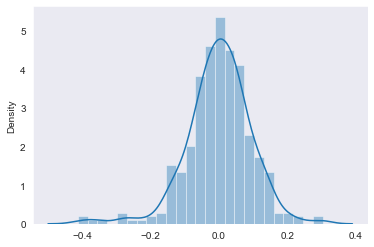

In [141]:
# Plotting the SNS histogram and finding the error terms
#fig = plt.figure()
#sns.distplot((y_train - y_train_price))
#fig.suptitle('Error Terms', fontsize = 12)
#plt.xlabel('Errors', fontsize = 12)

res = y_train - y_train_pred


plt.figure()
sns.distplot(res)
plt.show()

### Step 6: Prediction and Evaluation on Test data set

#### Making Predictions

In [142]:
bike_df_test.shape

(365, 33)

In [143]:
bike_df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
184,0,1,0,33.27085,63.7917,5.459106,6043,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [144]:
#create list of numeric vars
numeric_vars = ['atemp', 'hum', 'windspeed', 'cnt']

bike_df_test[numeric_vars] = min_max_scaler.transform(bike_df_test[numeric_vars])

#### Test data split into Predictor and Target Variable

In [145]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [146]:
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
184,0,1,0,0.769660,0.657364,0.078074,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.842587,0.610133,0.148050,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.329739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.335139,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.534310,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [147]:
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.487671,0.041096,0.673973,0.525096,0.644204,0.304528,0.257534,0.243836,0.252055,0.246575,0.101370,0.071233,0.084932,0.087671,0.084932,0.104110,0.082192,0.057534,0.068493,0.084932,0.082192,0.090411,0.106849,0.128767,0.150685,0.153425,0.167123,0.156164,0.136986,0.630137,0.024658,0.345205
std,0.500534,0.198785,0.469401,0.213217,0.145885,0.159863,0.437876,0.429984,0.434789,0.431609,0.302232,0.257567,0.279162,0.283204,0.279162,0.305822,0.275034,0.233180,0.252937,0.279162,0.275034,0.287163,0.309346,0.335402,0.358233,0.360891,0.373598,0.363509,0.344305,0.483430,0.155292,0.476088
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.049804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339801,0.534060,0.193797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.535113,0.640189,0.288004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698389,0.744955,0.394322,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.814264,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
X_test.shape[1]

32

In [149]:
#add a constant
X_test_sm = sm.add_constant(X_test)

In [150]:
#drop all the columns, as you did in training the model
X_test_sm = X_test_sm.drop(['season_fall','mnth_Jul','mnth_Nov','mnth_Feb','mnth_Dec','weekday_Fri','weekday_Sat','weekday_Sun','holiday','mnth_Apr','mnth_Jun','mnth_May','mnth_Mar','season_spring','weekday_Tue',
'weekday_Thu','weekday_Wed','weathersit_Clear','hum','mnth_Oct'], axis=1)

In [151]:
X_test_sm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep', 'weekday_Mon',
       'weathersit_Light_Snow', 'weathersit_Misty'],
      dtype='object')

In [152]:
#predict y_test

y_test_pred = lr_drop_20.predict(X_test_sm)

In [153]:
#evaluate the model with help sk learn r2 score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8099713060806867

#### Evaluate the Model

Plot the graph between actual and predicted values

Text(0, 0.5, 'y_pred')

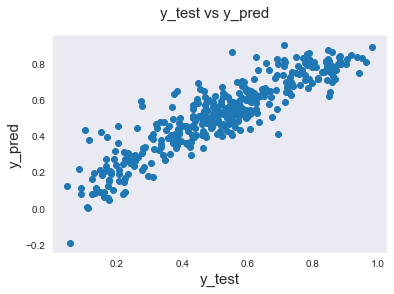

In [154]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15) 

### Linear Regression Equation looks like:

cnt = 0.1289 + 0.2425*yr + 0.0453*workingday + 0.4948*atemp - 0.1673*windspeed
      + 0.0914*season_summer + 0.1167*season_winter + 0.0619*mnth_Aug - 0.0666*mnth_Jan
	  + 0.1151*mnth_Sep + 0.0616*weekday_Mon - 0.2875*weathersit_Light_Snow
	  - 0.0869*weathersit_Misty


### Factors that influence Boom Bike demand:

- Positive Impact 
    - workingday 
    - atemp 
    - season_summer 
    - season_winter 
    - mnth_Aug 
    - mnth_Sep 
    - weekday_Mon 
- Negative Impact 
    - weathersit_Light_Snow
    - weathersit_Misty
    - windspeed
    - mnth_Jan

